In [30]:
from sklearn.neighbors import NearestNeighbors
from scipy.ndimage import uniform_filter1d
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN, HDBSCAN
import numpy as np
import geopandas as gpd 
import os
import pandas as pd 
from shapely import concave_hull, convex_hull, segmentize, minimum_rotated_rectangle
from shapely.ops import nearest_points
# ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [8]:
sample_size = 3

In [3]:
def polygon_distance(polygon1, polygon2):
    # Calculate the minimum distance between two polygons
    point1, point2 = nearest_points(polygon1, polygon2)
    return point1.distance(point2)

def compute_distance_matrix(polygons):
    # Create a distance matrix between all polygons
    num_polygons = len(polygons)
    distance_matrix = np.zeros((num_polygons, num_polygons))
    
    for i in range(num_polygons):
        for j in range(i + 1, num_polygons):
            distance_matrix[i, j] = polygon_distance(polygons[i], polygons[j])
            distance_matrix[j, i] = distance_matrix[i, j]  # Symmetry
    
    return distance_matrix

In [4]:
data_dir = r'D:\Projects\superparcels\data\Urban\Alameda_CA'
parcels = gpd.read_file(os.path.join(data_dir, 'sp_sample_06001_cluster_canidates.shp'))
utm = parcels.estimate_utm_crs().to_epsg()

In [5]:
parcels = parcels.to_crs(epsg=utm)  

In [6]:
unique_owners = parcels['OWNER'].unique()
print('Number of unique owners:', len(unique_owners))   

Number of unique owners: 38644


Owner: PATRICK JMONAGHAN
Owner: PRADEEPCHIKKU
Owner: CHARLENE AHAWKINS
Owner: JUSTINKILBY
Owner: LUCYANDRADE
Owner: NORMANLEE
Owner: JOHN DSMITH
Owner: MAURICE EDANCE
Owner: GLENN CWENIG
Owner: TERESANAZARETH
Owner: WEI LZHAO
Owner: DUSTYGILLELAND
Owner: PATRICK BBAILEY
Owner: ROGER CTHOMPSON
Owner: THOMAS PSULLIVAN
Owner: GINASANFILIPPO
Owner: KATHYLEE
Owner: TIFFANYELAM
Owner: JOHNHARRIS
Owner: ESTELLA ETISCORNIA
Owner: HELEN HYU
Owner: JENNIFER ALEE
Owner: SHARON DROGERS
Owner: MARKATTARHA
Owner: SHAHABLAAL
Owner: CLINTJACKMAN
Owner: SANDEEPKAUR
Owner: FARHATSAFI
Owner: JASLEENKAUR
Owner: EVAN MJACKSON
Owner: JASONISSA GKARKAR
Owner: BENITO MDELGADOOLSON
Owner: IONASPORGESKIRIAKOU
Owner: ALFRED GBLOCH
Owner: MY QHUYNH
Owner: MINGJIANZHANG
Owner: ANNEPERKINS
Owner: PAMELA ERANDOLPH
Owner: SHAKIR AKHAN
Owner: BRANDENRENFRO
Owner: WILLIAMPRASAD
Owner: TONI KWILKERSON
Owner: JENNIE TDANG
Owner: JESUS OALCALA
Owner: BECKY AYAMAGAMI
Owner: SALVADORSANDOVAL
Owner: CARL PVALDERAMA
Owner: AN

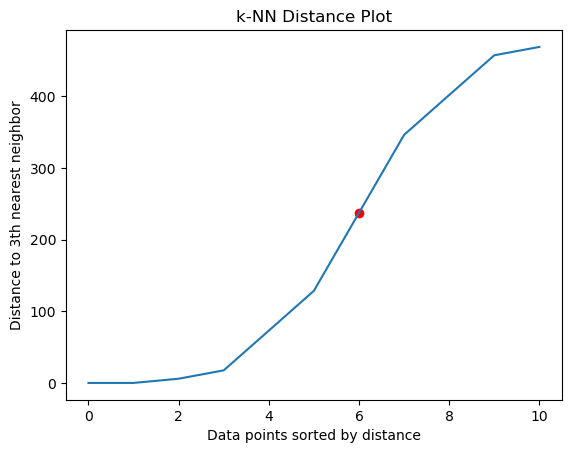

In [29]:
for owner in unique_owners:
    print('Owner:', owner)
    if owner != 'COLEMANFOLEY':
        continue
    owner_parcels = parcels[parcels['OWNER'] == owner]
    polygons = owner_parcels['geometry'].to_list()
    distance_matrix = compute_distance_matrix(polygons)

    # Assuming distance_matrix is the precomputed distance matrix
    neighbors = NearestNeighbors(n_neighbors=sample_size, metric='precomputed')
    neighbors_fit = neighbors.fit(distance_matrix)

    distances, indices = neighbors_fit.kneighbors(distance_matrix)

    # Sort distances to the k-th nearest neighbor
    sorted_distances = np.sort(distances[:, sample_size-1])
    smooth_dist = uniform_filter1d(sorted_distances, size=10)
    difference = np.diff(smooth_dist)
    elbow_index = np.argmax(difference) + 1
    optimal_distance = smooth_dist[elbow_index]
    plt.plot(smooth_dist)
    plt.scatter(elbow_index, optimal_distance, c='r', label='Elbow')
    plt.title('k-NN Distance Plot')
    plt.xlabel('Data points sorted by distance')
    plt.ylabel(f'Distance to {sample_size}th nearest neighbor')
    plt.show()

    break

In [31]:
distances

array([[   0.        ,    0.        ,   58.5493405 ],
       [   0.        ,    0.        ,  116.80315494],
       [   0.        ,    0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        ],
       [   0.        ,    0.        ,  556.37123483],
       [   0.        ,    0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        ],
       [   0.        ,    0.        ,  554.67768252],
       [   0.        ,    0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        ],
       [   0.        ,    0.        , 1088.3777567 ]])

In [32]:
difference

array([  0.        ,   5.85493405,  11.68031549,  55.46776825,
        55.63712348, 108.83777567, 108.83777567,  55.63712348,
        55.46776825,  11.68031549])

In [33]:
optimal_distance

237.47791694977695